### titanic

os.walk()   
指定したディレクトリ（/kaggle/input）以下のすべてのディレクトリとファイルを再帰的にたどる。   
os.path.join()    
ファイルパスを正しく結合するための関数。   
異なるOS間（Windows、Linux、Mac）でも、自動的に適切な区切り文字（/ や \）を使う、安全で可搬性の高いコード。   
ex,   
os.path.join(path1, path2, path3, ...)
path1, path2, ... をつなげて、1つのパス文字列にする。   
区切り文字はOSに応じて自動処理される。   

/kaggle/input/   
├── dataset1/   
│   ├── file1.csv   
│   └── file2.csv   
├── dataset2/   
│   └── file3.csv   


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/titanic/train.csv", index_col=0) # 学習用データ
test = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/titanic/test.csv", index_col=0)   # 評価用データ
sample_submit = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/titanic/sample_submit.csv", index_col=0, header=None) # 応募用サンプルファイル

### trainテーブル(訓練データ)
|カラム	ヘッダ名称	データ型	説明|
|-------------|
0	id	int	インデックスとして使用
1	survived	boolean	生還結果（1=生還, 0=死亡）
2	pclass	int	客室のクラス（1,2,3の順に高級クラス）
3	sex	char	性別
4	age	int	年齢
5	sibsp	int	乗船していた兄弟、配偶者の数
6	parch	int	乗船していた両親、子供の数
7	fare	float	運賃
8	embarked	char	乗船した港（S=Southampton, C=Cherbourg, Q=Queenstown）

In [ ]:
train.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,,
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
7,0,3,male,2.0,3,1,21.0750,S
9,1,2,female,14.0,1,0,30.0708,C
11,1,1,female,58.0,0,0,26.5500,S


### testテーブル(評価用データ)

|カラム	ヘッダ名称	データ型	説明|
|------|
0	id	int	インデックスとして使用
1	pclass	int	客室のクラス（1,2,3の順に高級クラス）
2	sex	char	性別
3	age	int	年齢
4	sibsp	int	乗船していた兄弟、配偶者の数
5	parch	int	乗船していた両親、子供の数
6	fare	float	運賃
7	embarked	char	乗船した港（S=Southampton, C=Cherbourg, Q=Queenstown）

In [ ]:
test.head()

,pclass,sex,age,sibsp,parch,fare,embarked
id,,,,,,,
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S


### sample_submitテーブル(応募用サンプル)
サンプルの予測結果が入力された投稿用ファイルのフォーマット

|カラム	ヘッダ名称	データ型	説明|
|----|
0	無し	int	インデックスとして使用
1	無し	float

予測した生存確率（0.0～1.0）

In [ ]:
#sample_submit.sum()
sample_submit.count()
sample_submit.head()

,1
0,
0,0
1,1
2,0
5,1
6,1


### 1.課題設定
- 目的変数 = 生存の有無(0or1)
- 教師あり学習

### 2.データ理解、前処理
- .describe()=データのばらつき、.shape=行数と列数、.info()=データの型や欠損値、.value_counts()=空欄以外のカウントなどを使用して、データを理解する
- .groupby([]).mean()でおおよその相関を1つの変数に関して確認できる
- pd.get_dummies(df).corrwith(df["target"]) ですべての変数に対しての相関係数が確認できる
- 外れ値処理
- 欠損値除去
int = 平均値 , カテゴリ変数 = 最頻値 などで埋める
- カテゴリ変数のエンコーディング

In [ ]:
test.describe()

,pclass,age,sibsp,parch,fare
count,446.000000,354.000000,446.000000,446.000000,446.000000
mean,2.320628,30.194915,0.500000,0.331839,30.452381
std,0.838873,14.899140,1.002805,0.756823,47.186192
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.250000,0.000000,0.000000,13.500000
75%,3.000000,39.000000,1.000000,0.000000,30.000000
max,3.000000,74.000000,8.000000,6.000000,512.329200


In [ ]:
print(train.shape)
print(test.shape)

(445, 8)
(446, 7)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 3 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    int64  
 1   pclass    445 non-null    int64  
 2   sex       445 non-null    object 
 3   age       360 non-null    float64
 4   sibsp     445 non-null    int64  
 5   parch     445 non-null    int64  
 6   fare      445 non-null    float64
 7   embarked  443 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.3+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    446 non-null    int64  
 1   sex       446 non-null    object 
 2   age       354 non-null    float64
 3   sibsp     446 non-null    int64  
 4   parch     446 non-null    int64  
 5   fare      446 non-null    float64
 6   embarked  446 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 27.9+ KB


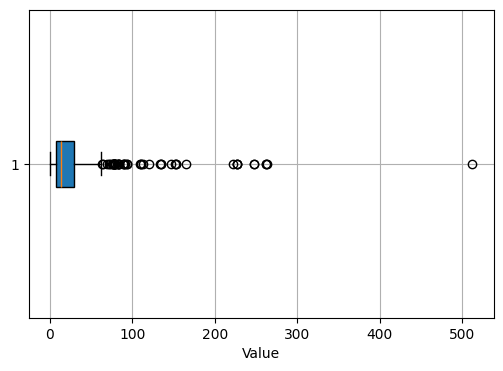

In [ ]:
import matplotlib.pyplot as plt


# 箱ひげ図の描画
plt.figure(figsize=(6, 4))
plt.boxplot(test['fare'], vert=False, patch_artist=True)
plt.xlabel("Value")
plt.grid(True)
plt.show()


In [ ]:
# plt.boxplot(test['age'], vert=False, patch_artist=True)
# plt.xlabel("Value")
# plt.grid(True)
# plt.show()
test['age'].head()

,age
id,
0,22.0
1,38.0
2,26.0
5,NaN
6,54.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e1cbaa9dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e1cbaa9fb30>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7e1cbaa9c8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e1cbaa9c320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e1cbaa9d430>],
 'means': []}

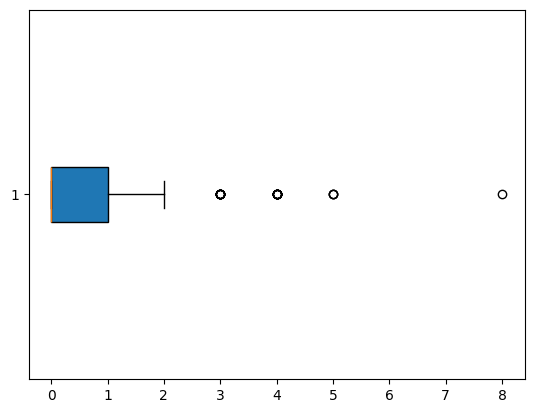

In [ ]:
plt.boxplot(test['sibsp'], vert=False, patch_artist=True)
#家族の人数


{'whiskers': [<matplotlib.lines.Line2D at 0x7e1cba70f9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e1cba70d4c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7e1cba65eb70>],
 'medians': [<matplotlib.lines.Line2D at 0x7e1cbac3d040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e1cbac3dc70>],
 'means': []}

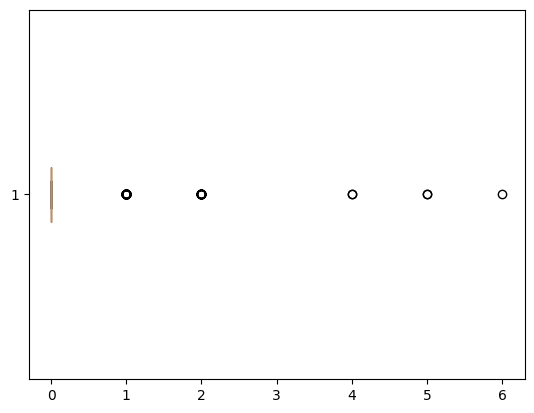

In [ ]:
plt.boxplot(test['parch'], vert=False, patch_artist=True)
#家族の人数

In [ ]:
train[['pclass', 'survived']].groupby(['pclass']).mean()

,survived
pclass,
1,0.685185
2,0.443299
3,0.258333


In [ ]:
train[['sex', 'survived']].groupby(['sex']).mean()

,survived
sex,
female,0.775641
male,0.200692


In [ ]:
# age = 平均 , embarked(入船港) = 最頻値 でNaNを埋める
data = pd.concat([train, test])
data.info()
data['age'] = data['age'].fillna(data['age'].mean())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 3 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    float64
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB


In [ ]:
#性別を1,0に分ける
pd.get_dummies(data["sex"], dtype=float)
data = data.merge(pd.get_dummies(data["sex"],dtype=float),on = "id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 3 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    float64
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   female    891 non-null    float64
 9   male      891 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 76.6+ KB


In [ ]:
#出発港にダミー変数をつける
pd.get_dummies(data["embarked"], dtype=float)
data = data.merge(pd.get_dummies(data["embarked"],dtype=float),on = "id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 3 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  445 non-null    float64
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   female    891 non-null    float64
 9   male      891 non-null    float64
 10  C         891 non-null    float64
 11  Q         891 non-null    float64
 12  S         891 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 97.5+ KB


In [ ]:
# 女性なら1,男性なら0
data.drop(["sex", "embarked","male"], axis=1, inplace=True)
data.rename(columns={'female': 'sex'}, inplace=True)
data.head()

,survived,pclass,age,sibsp,parch,fare,sex,C,Q,S
id,,,,,,,,,,
3,1.0,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0
4,0.0,3,35.0,0,0,8.0500,0.0,0.0,0.0,1.0
7,0.0,3,2.0,3,1,21.0750,0.0,0.0,0.0,1.0
9,1.0,2,14.0,1,0,30.0708,1.0,1.0,0.0,0.0
11,1.0,1,58.0,0,0,26.5500,1.0,0.0,0.0,1.0


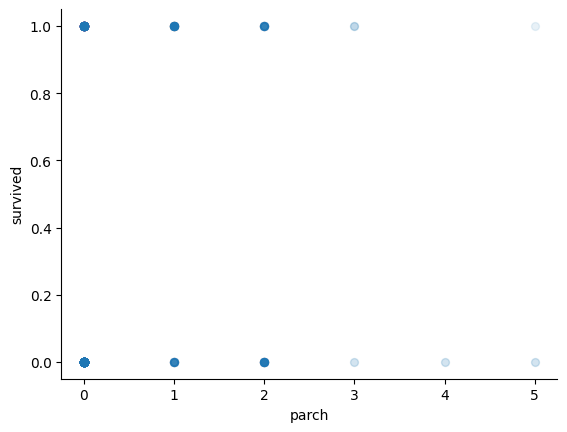

In [ ]:
# @title 散布図で可視化

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='parch', y='survived', s=32, alpha=.1)
plt.gca().spines[['top', 'right',]].set_visible(False)

### PowerTransformer

やっていること    
Box-Cox変換やYeo-Johnson変換といった 非線形変換 を使って、
データの 分布そのものを「正規分布っぽく」変形 する。

前提

Box-Cox：入力が正の値だけのとき

Yeo-Johnson：負の値を含んでもOK

特徴

歪度を取り除き、よりガウス分布に近づける。

線形モデルや正則化手法でうまく効くことがある。

外れ値にもある程度強い。

### flatten
多次元をペッタンコにして一本の配列にする関数

In [ ]:
# @title 外れ値があるage,sibsp,parch,fareの値を正規化
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson")
age = pt.fit_transform(data["age"].values.reshape(-1, 1))
age_trans = pt.fit_transform(age)
age_trans = pd.DataFrame(age_trans, columns=["age2"])
data = pd.concat([data,age_trans],axis=1)
data = data.drop(["age"],axis=1)
data = data.rename(columns={"age2":"age"})
data.head(10)
print(data.head(10))

    survived  pclass  sibsp  parch     fare  sex    C    Q    S       age
3        1.0       1      1      0  53.1000  1.0  0.0  0.0  1.0 -1.225013
4        0.0       3      0      0   8.0500  0.0  0.0  0.0  1.0  2.024106
7        0.0       3      3      1  21.0750  0.0  0.0  0.0  1.0  0.051826
9        1.0       2      1      0  30.0708  1.0  1.0  0.0  0.0 -1.779518
11       1.0       1      0      0  26.5500  1.0  0.0  0.0  1.0  0.051826
13       0.0       3      1      5  31.2750  0.0  0.0  0.0  1.0  0.051826
16       0.0       3      4      1  29.1250  0.0  0.0  1.0  0.0  0.051826
19       1.0       3      0      0   7.2250  1.0  1.0  0.0  0.0 -2.300174
23       1.0       1      0      0  35.5000  0.0  0.0  0.0  1.0 -0.631690
24       0.0       3      3      1  21.0750  1.0  0.0  0.0  1.0 -0.039418


In [ ]:
sibsp = pt.fit_transform(data["sibsp"].values.reshape(-1, 1))
sibsp_trans = pt.fit_transform(sibsp)
sibsp_trans = pd.DataFrame(sibsp_trans, columns=["sibsp2"])
data = pd.concat([data,sibsp_trans],axis=1)
data = data.drop(["sibsp"],axis=1)
data = data.rename(columns={"sibsp2":"sibsp"})
data.head(10)
print(data.head(10))

    survived  pclass  parch     fare  sex    C    Q    S       age     sibsp
3        1.0       1      0  53.1000  1.0  0.0  0.0  1.0 -1.225013  1.446505
4        0.0       3      0   8.0500  0.0  0.0  0.0  1.0  2.024106 -0.682133
7        0.0       3      1  21.0750  0.0  0.0  0.0  1.0  0.051826 -0.682133
9        1.0       2      0  30.0708  1.0  1.0  0.0  0.0 -1.779518  1.521794
11       1.0       1      0  26.5500  1.0  0.0  0.0  1.0  0.051826 -0.682133
13       0.0       3      5  31.2750  0.0  0.0  0.0  1.0  0.051826 -0.682133
16       0.0       3      1  29.1250  0.0  0.0  1.0  0.0  0.051826 -0.682133
19       1.0       3      0   7.2250  1.0  1.0  0.0  0.0 -2.300174  1.446505
23       1.0       1      0  35.5000  0.0  0.0  0.0  1.0 -0.631690 -0.682133
24       0.0       3      1  21.0750  1.0  0.0  0.0  1.0 -0.039418 -0.682133


In [ ]:
parch = pt.fit_transform(data["parch"].values.reshape(-1, 1))
parch_trans = pt.fit_transform(parch)
parch_trans = pd.DataFrame(parch_trans, columns=["parch2"])
data = pd.concat([data,parch_trans],axis=1)
data = data.drop(["parch"],axis=1)
data = data.rename(columns={"parch2":"parch"})
data.head(10)
print(data.head(10))

    survived  pclass     fare  sex    C    Q    S       age     sibsp  \
3        1.0       1  53.1000  1.0  0.0  0.0  1.0 -1.225013  1.446505   
4        0.0       3   8.0500  0.0  0.0  0.0  1.0  2.024106 -0.682133   
7        0.0       3  21.0750  0.0  0.0  0.0  1.0  0.051826 -0.682133   
9        1.0       2  30.0708  1.0  1.0  0.0  0.0 -1.779518  1.521794   
11       1.0       1  26.5500  1.0  0.0  0.0  1.0  0.051826 -0.682133   
13       0.0       3  31.2750  0.0  0.0  0.0  1.0  0.051826 -0.682133   
16       0.0       3  29.1250  0.0  0.0  1.0  0.0  0.051826 -0.682133   
19       1.0       3   7.2250  1.0  1.0  0.0  0.0 -2.300174  1.446505   
23       1.0       1  35.5000  0.0  0.0  0.0  1.0 -0.631690 -0.682133   
24       0.0       3  21.0750  1.0  0.0  0.0  1.0 -0.039418 -0.682133   

       parch  
3  -0.560497  
4  -0.560497  
7  -0.560497  
9   1.779564  
11 -0.560497  
13 -0.560497  
16 -0.560497  
19  1.789483  
23 -0.560497  
24 -0.560497  


In [ ]:
fare = pt.fit_transform(data["fare"].values.reshape(-1, 1))
fare_trans = pt.fit_transform(fare)
fare_trans = pd.DataFrame(fare_trans, columns=["fare2"])
data = pd.concat([data,fare_trans],axis=1)
data = data.drop(["fare"],axis=1)
data = data.rename(columns={"fare2":"fare"})
data.head(10)
print(data.head(10))

    survived  pclass  sex    C    Q    S       age     sibsp     parch  \
3        1.0       1  1.0  0.0  0.0  1.0 -1.225013  1.446505 -0.560497   
4        0.0       3  0.0  0.0  0.0  1.0  2.024106 -0.682133 -0.560497   
7        0.0       3  0.0  0.0  0.0  1.0  0.051826 -0.682133 -0.560497   
9        1.0       2  1.0  1.0  0.0  0.0 -1.779518  1.521794  1.779564   
11       1.0       1  1.0  0.0  0.0  1.0  0.051826 -0.682133 -0.560497   
13       0.0       3  0.0  0.0  0.0  1.0  0.051826 -0.682133 -0.560497   
16       0.0       3  0.0  0.0  1.0  0.0  0.051826 -0.682133 -0.560497   
19       1.0       3  1.0  1.0  0.0  0.0 -2.300174  1.446505  1.789483   
23       1.0       1  0.0  0.0  0.0  1.0 -0.631690 -0.682133 -0.560497   
24       0.0       3  1.0  0.0  0.0  1.0 -0.039418 -0.682133 -0.560497   

        fare  
3   0.542359  
4   0.424448  
7  -0.880616  
9   0.202049  
11 -0.880616  
13 -0.789129  
16 -0.880018  
19  0.842582  
23 -0.496093  
24 -0.880018  


In [ ]:
test = data[data['survived'].isnull()]
del test['survived']
test.isna().count()

,0
pclass,446
sex,446
C,446
Q,446
S,446
age,446
sibsp,446
parch,446
fare,446


In [ ]:
train = data[data['survived'].notnull()]
train.head()

,survived,pclass,sex,C,Q,S,age,sibsp,parch,fare
3,1.0,1,1.0,0.0,0.0,1.0,-1.225013,1.446505,-0.560497,0.542359
4,0.0,3,0.0,0.0,0.0,1.0,2.024106,-0.682133,-0.560497,0.424448
7,0.0,3,0.0,0.0,0.0,1.0,0.051826,-0.682133,-0.560497,-0.880616
9,1.0,2,1.0,1.0,0.0,0.0,-1.779518,1.521794,1.779564,0.202049
11,1.0,1,1.0,0.0,0.0,1.0,0.051826,-0.682133,-0.560497,-0.880616


### SVC

| カーネル                               | 数式・仕組み                                   | 特徴                 | 長所                            | 短所                             | よく使う場面                     |
| ---------------------------------- | ---------------------------------------- | ------------------ | ----------------------------- | ------------------------------ | -------------------------- |
| **linear**                         | $K(x, x') = x^\top x'$                   | 線形分離               | シンプルで高速、係数`coef_`で特徴量の重要度が見える | 非線形関係を表現できない                   | 特徴量が多い・解釈性を重視する時（テキスト分類など） |
| **poly（多項式）**                      | $K(x, x') = (x^\top x' + c)^d$           | 多項式写像              | 非線形を表現できる                     | 次元が爆発しやすい、パラメータ（次数d, c）の調整が難しい | 複雑すぎない非線形境界が欲しいとき          |
| **rbf（ガウス/Radial Basis Function）** | $K(x, x') = \exp(-\gamma \|x - x'\|^2)$  | 局所的な影響を持つ          | 非線形に強い、汎用的                    | γの調整が必要、解釈性なし                  | 一般的なSVMのデフォルト、万能選手         |
| **sigmoid**                        | $K(x, x') = \tanh(\alpha x^\top x' + c)$ | ニューラルネットの活性化関数に似てる | 特定状況で有効                       | 不安定になりやすい、使われることは稀             | 実験的に試すとき                   |

url = "https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html"

In [ ]:
# モデルの定義
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(train.drop(["survived"] ,axis=1), train["survived"])

SVC(kernel='linear')

In [ ]:
# モデルの検証
print('train score : ', clf.score(train.drop("survived", axis=1), train["survived"]))

train score :  0.7910112359550562


| 処理内容 | コード例                             |
| ---- | -------------------------------- |
| 学習   | `model.fit(X_train, y_train)`    |
| 予測   | `model.predict(X_test)`          |
| 確率予測 | `model.predict_proba(X_test)`    |
| 精度評価 | `accuracy_score(y_test, y_pred)` |


In [ ]:
pred = clf.predict(test)
pred = pd.DataFrame(pred, columns=['survived'])
pred.dropna(axis=0)
print(test.isna().count())

pclass    446
sex       446
C         446
Q         446
S         446
age       446
sibsp     446
parch     446
fare      446
dtype: int64


In [ ]:
test = pd.concat([test.reset_index(drop=False), pred.reset_index(drop=True)], axis=1)
print(test.isna().count())
submit = test.drop(["pclass","age","sibsp","parch","fare","S","C","Q","sex"],axis=1)
#print(submit.isna().count())

index       446
pclass      446
sex         446
C           446
Q           446
S           446
age         446
sibsp       446
parch       446
fare        446
survived    446
dtype: int64


In [ ]:
submit.isna().count()

,0
index,446
survived,446


In [ ]:
# prompt: DataFrame submit を使用: csvを作成する

submit.to_csv('submit_linear2.csv', index=False, header=False)

In [ ]:
# 特徴量の重み
print(clf.coef_)

[[-1.04282098e-04  2.00012625e+00 -1.42247800e-04  1.21408330e-04
   2.08394693e-05  9.34036047e-05 -3.29801806e-06 -5.79917605e-05
  -1.25090212e-06]]


PowerTransformerありとなしで結果が変わらなかった、、